<b>Disclaminer:</b> <br>
I've bootlegged this code from a Youtube Channel called Computer Science. In one of his videos ,<a href = "https://www.youtube.com/watch?v=QIUxPv5PJOY&t=464s" target = 'blank'> Stock Prediction Using Pythyon </a>, he will prediction of a stock price. I will be following along with this video.  However, after I get this program working, i'll play with it a little and add my own little spice to everything nice.<br>
Credit to where credit is due. <br>
You get them Computer Science Youtube guy! <br>
No Siraj Raval here.<br>
Let the copying start...

<b>Stock Market Prediction</b>

Discription: This program uses an aftificla recurent neural network called "Long Short Term Memory (LSTM) to predict the closing stock price of a corporation using the past 60 day stock price. 

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<b>Get the stock quote</b>

In [2]:
df = web.DataReader('X', data_source='yahoo', start ='2012-01-01', end = '2021-5-20')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,28.480000,27.420000,27.420000,28.170000,11470000.0,25.952297
2012-01-04,28.730000,27.799999,28.000000,28.440001,8549700.0,26.201050
2012-01-05,28.299999,27.510000,28.170000,27.790001,9099200.0,25.602221
2012-01-06,28.200001,27.180000,28.030001,27.299999,9081900.0,25.150791
2012-01-09,27.740000,26.639999,27.459999,26.780001,8010600.0,24.671736
...,...,...,...,...,...,...
2021-05-14,26.309999,24.750000,25.440001,25.500000,24622200.0,25.500000
2021-05-17,26.610001,25.110001,25.600000,26.360001,21845100.0,26.360001
2021-05-18,26.559999,25.480000,26.410000,25.620001,18234900.0,25.620001


df.shape

Visualize the closing price history

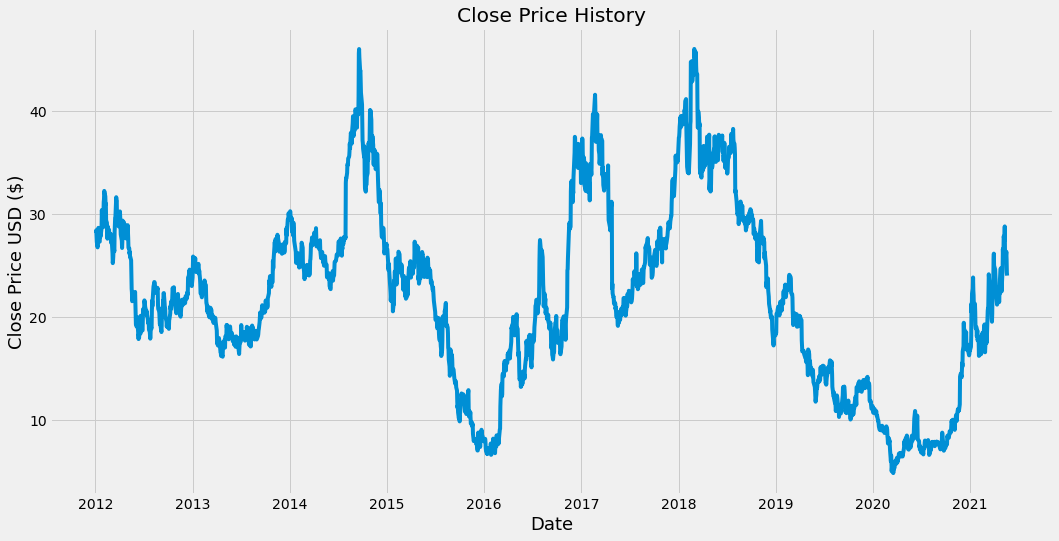

In [3]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()


In [4]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1889

In [5]:
#scale the data (matrix scaler- unit vector)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.56604235],
       [0.57261011],
       [0.55679888],
       ...,
       [0.50401366],
       [0.47239116],
       [0.46558019]])

In [6]:
#create the training data set
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

#60 day movement
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.56604235, 0.57261011, 0.55679888, 0.54487959, 0.53223064,
       0.54463638, 0.57552908, 0.57820484, 0.54804187, 0.54560936,
       0.56579909, 0.56871811, 0.5575286 , 0.57261011, 0.58525906,
       0.62028705, 0.59523235, 0.60763805, 0.57966433, 0.61517883,
       0.6390173 , 0.64558505, 0.66528828, 0.6560448 , 0.65239602,
       0.63342256, 0.6351253 , 0.59596207, 0.59012408, 0.5619071 ,
       0.55266363, 0.58161032, 0.57188034, 0.57382634, 0.55387986,
       0.56506933, 0.56506933, 0.56409635, 0.55971785, 0.5429336 ,
       0.55144735, 0.54998786, 0.51836536, 0.4950134 , 0.50085139,
       0.51155439, 0.53393338, 0.52274386, 0.56944783, 0.58866459,
       0.60204331, 0.60447582, 0.65045002, 0.64388231, 0.64193632,
       0.59766481, 0.60423257, 0.5993676 , 0.59425933, 0.58161032])]
[0.5959620671442655]



In [7]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
#Reshape the data (we want 3d)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1829, 60, 1)

In [9]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1829/1829 [==============================] - 46s 17ms/step - loss: 0.0086


In [12]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
#create data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [13]:
#Conver the Data to a numpy array
x_test = np.array(x_test)

In [14]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [16]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.9635399340473516

<ipython-input-17-6573457e025f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


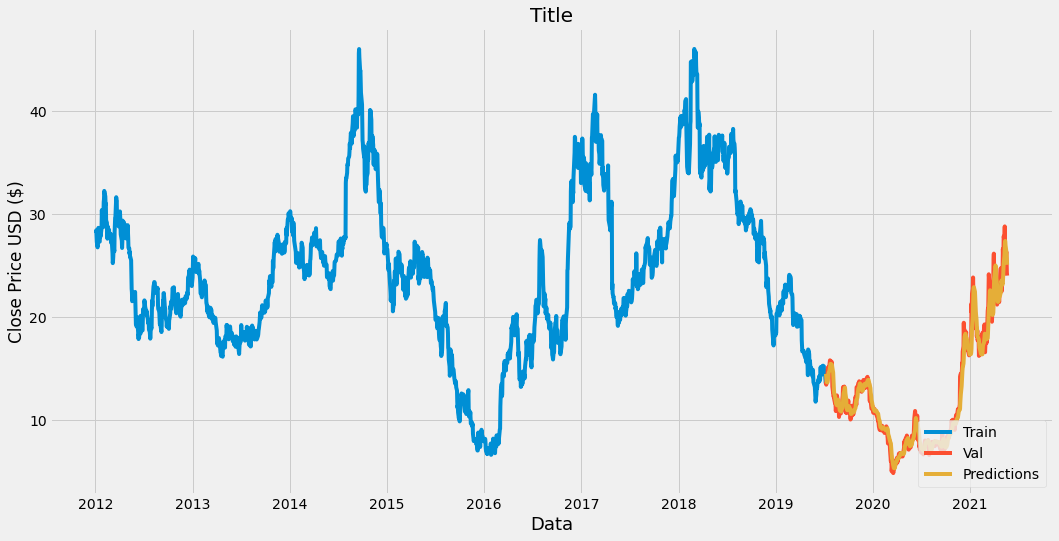

In [17]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the model
plt.figure(figsize=(16,8))
plt.title("Title")
plt.xlabel("Data", fontsize = 18)
plt.ylabel("Close Price USD ($)")
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [18]:
#Show the valid and predicted prices

valid

,Close,Predictions
Date,,
2019-07-09,13.730000,14.511296
2019-07-10,13.470000,14.202682
2019-07-11,13.790000,13.899163
2019-07-12,14.150000,13.715279
2019-07-15,14.610000,13.693462
...,...,...
2021-05-14,25.500000,26.982210
2021-05-17,26.360001,26.378555
2021-05-18,25.620001,25.998976


In [36]:
#Get the quote
united_states_steel  = web.DataReader('x', data_source='yahoo', start = '2012-01-01', end = '2021-05-27' )

#create a new dataframe

new_df = united_states_steel.filter(['Close'])
#Get the last 60 day closing price values and convert the datafram into an array
last_60_days = new_df[-60:].values
#Scale the data 0-1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print("Prediction:",pred_price)

Prediction: [[24.137592]]


In [35]:
#Get Closing Price
united_states_steel2  = web.DataReader('x', data_source='yahoo', start = '2012-01-01', end = '2021-05-27' )
print("Accual Closing:\n",united_states_steel2['Close'])

Accual Closing:
 Date
2012-01-03    28.170000
2012-01-04    28.440001
2012-01-05    27.790001
2012-01-06    27.299999
2012-01-09    26.780001
                ...    
2021-05-21    23.950001
2021-05-24    24.320000
2021-05-25    23.610001
2021-05-26    24.670000
2021-05-27    26.080000
Name: Close, Length: 2366, dtype: float64
